# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [112]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [50]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)

# Import Data

In [51]:
# Import the necessary CSVs to Pandas DataFrames
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [109]:
# Define Panel Visualization Functions
def housing_units_per_year():
    """Housing Units Per Year."""    
    annual_housing_unit = (
           sfo_data[["housing_units"]]
    .groupby(sfo_data.index)
    .mean()
    )
    return annual_housing_unit.plot.bar(ylim=(350000,400000), xlabel="Year", ylabel='Housing Units', figsize=(7,7))



def average_gross_rent():
#     """Average Gross Rent in San Francisco Per Year."""
    average_rent = (
     sfo_data[["gross_rent"]]
     .groupby([sfo_data.index])
     .mean()
    )
    return average_rent.plot.bar( xlabel="Year", ylabel='Average Gross Rent', figsize=(7,7))


def average_sales_price():
#     """Average Sales Price Per Year."""
    
    average_sales = (
     sfo_data[["sale_price_sqr_foot"]]
     .groupby([sfo_data.index])
     .mean()
    )
    return average_sales.plot.bar( xlabel="Year", ylabel='Average Sales Price Per SqFt', figsize=(7,7))


def average_price_by_neighborhood():
#     """Average Prices by Neighborhood."""
    
    average_saleprice_by_neighborhood = (
     sfo_data[["neighborhood","sale_price_sqr_foot"]]
     .groupby(["neighborhood"])
     .mean()
    )

    plot = average_saleprice_by_neighborhood.plot.line(y="sale_price_sqr_foot", title ="Average Price per SqFt by Year", ylabel="Price per SqFt", color='green') 
    return plot

def top_most_expensive_neighborhoods():
#     """Top 10 Most Expensive Neighborhoods."""

    neighborhood_df_mean=sfo_data.groupby(by="neighborhood").mean()
    neighborhood_df_10= neighborhood_df_mean.sort_values(by="sale_price_sqr_foot", ascending=False).head(10)
    top_plot=  neighborhood_df_10.hvplot.bar(
    "neighborhood",
    "sale_price_sqr_foot",
    xlabel="Neighborhood",
    ylabel="Avg. Sale Price per Square Foot",
    rot=90 
        )
    return top_plot
top_most_expensive_neighborhoods()

def most_expensive_neighborhoods_rent_sales():
#     """Comparison of Rent and Sales Prices of Most Expensive Neighborhoods."""   
    
    neighborhood_df_mean=sfo_data.groupby(by="neighborhood").mean()
    neighborhood_df_10= neighborhood_df_mean.sort_values(by="sale_price_sqr_foot", ascending=False).head(10)
    return neighborhood_df_10
    
    
def parallel_coordinates():
#     """Parallel Coordinates Plot."""

    neighborhood_df_10_categories = most_expensive_neighborhoods_rent_sales().reset_index()
    return px.parallel_categories(
        neighborhood_df_10_categories,
        dimensions=["neighborhood", "sale_price_sqr_foot", "housing_units","gross_rent"],
        color="sale_price_sqr_foot",
        color_continuous_scale=px.colors.sequential.Inferno,
        labels={
            "neighborhood": "neighborhood",
            "sale_price_sqr_foot": "sale_price_sqr_foot",
            "housing_units": "housing_units",
            "gross_rent": "gross_rent"
        }
        )

#parallel_coordinates()

def parallel_categories():
#     """Parallel Categories Plot."""
    neighborhood_df_10 = most_expensive_neighborhoods_rent_sales().reset_index()
    neighborhood_df_10_coordinates=neighborhood_df_10 .drop(columns="neighborhood")
    return px.parallel_coordinates(neighborhood_df_10_coordinates,color="sale_price_sqr_foot")

#parallel_categories()

def neighborhood_map():
#     """Neighborhood Map."""
    
    # Set the mapbox access token
# Read the Mapbox API key

    home = Path.home() / ".env"  # windows 1/2
    load_dotenv(home)  # windows 2/2

    map_box_api = os.getenv("MAPBOX_PUBLIC_TOKEN")

    # Set the Mapbox API
    px.set_mapbox_access_token(map_box_api)

    # Create a scatter mapbox to analyze neighborhood info
    # Plot Data
    # Join the average values with the neighborhood locations
    df = pd.read_csv(Path("./Data/neighborhoods_coordinates.csv")).drop_duplicates()
    location_to_plot = df[["Neighborhood", "Lat", "Lon"]]
    location_latlon= location_to_plot.set_index("Neighborhood")
    location_latlon

    joined_df = pd.concat([location_latlon,most_expensive_neighborhoods_rent_sales()], axis=1)
    joined_df=joined_df.reset_index()
    joined_df_renamed=joined_df.rename(columns={"index":"Neighborhood"})
    joined_df_renamed.dropna(inplace=True)
    joined_df_renamed
    map_plot = px.scatter_mapbox(
        joined_df_renamed,  # replace with df to watch your computer slow to an absolute crawl!
        lat="Lat",
        lon="Lon",
        size="sale_price_sqr_foot",
        color="gross_rent",
        zoom=4,
        title = "Average Sale Price Per Square Foot and Gross Rent in San Francisco"
        )
    return map_plot



def sunburst():
#     """Sunburst Plot."""
    sunburst_df =neighborhood_df[neighborhood_df["neighborhood"].isin(expenseive_neighborhood["neighborhood"])]
    sunburst_df

    return px.sunburst(sunburst_df, path=['year', 'neighborhood'], values='sale_price_sqr_foot', color='gross_rent')



<AxesSubplot:xlabel='neighborhood'>

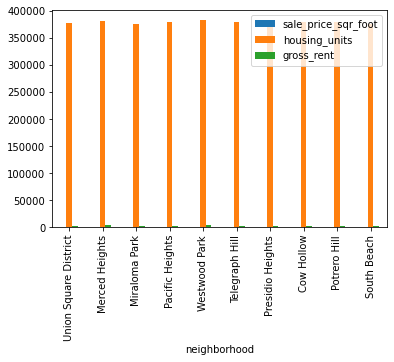

In [119]:
neighborhood_df_mean=sfo_data.groupby(by="neighborhood").mean()
neighborhood_df_10= neighborhood_df_mean.sort_values(by="sale_price_sqr_foot", ascending=False).head(10)
neighborhood_df_10.hvplot.bar(
    "neighborhood",
    "sale_price_sqr_foot",
    xlabel="Neighborhood",
    ylabel="Avg. Sale Price per Square Foot",
    rot=90

)
neighborhood_df_10.plot.bar()


## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

In [97]:
# Create a Title for the Dashboard
# YOUR CODE HERE!

# # Create panels to structure the layout of the dashboard
# geo_row = pn.Row(
#     "## Averge Housing Units and Rent"
#     , housing_units_per_year()
#     , average_gross_rent()
#     )
# geo_row
# Create a tab layout for the dashboard
# YOUR CODE HERE!


# Create the dashboard
# YOUR CODE HERE!

## Serve the Panel Dashboard

In [54]:
# Serve the# dashboard
# YOUR CODE HERE!

# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

<AxesSubplot:xlabel='Year', ylabel='Housing Units'>

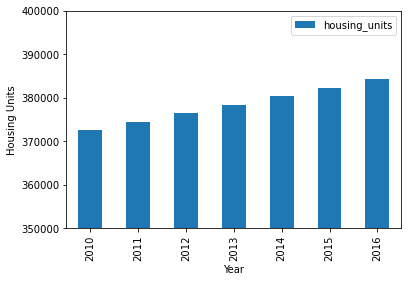

In [95]:
housing_units_per_year()

<AxesSubplot:xlabel='year'>

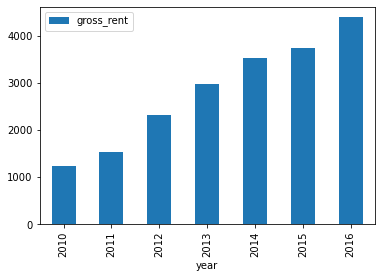

In [96]:
average_gross_rent()

<AxesSubplot:xlabel='Year', ylabel='Average Sales Price Per SqFt'>

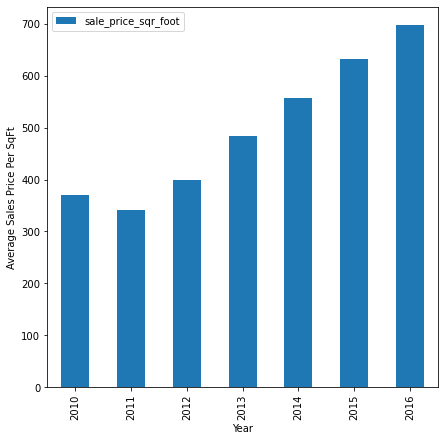

In [101]:
average_sales_price()

<AxesSubplot:title={'center':'Average Price per SqFt by Year'}, xlabel='neighborhood', ylabel='Price per SqFt'>

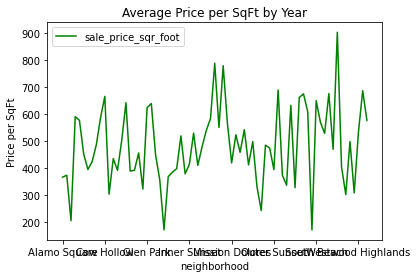

In [102]:
average_price_by_neighborhood()

In [108]:
top_most_expensive_neighborhoods()

:Bars   [neighborhood]   (sale_price_sqr_foot)

In [60]:
# most_expensive_neighborhoods_rent_sales()

In [61]:
# neighborhood_map().show()

In [62]:
# parallel_categories()

In [73]:
# parallel_coordinates()
home = Path.home() / ".env"  # windows 1/2
load_dotenv(home)  # windows 2/2

map_box_api = os.getenv("MAPBOX_PUBLIC_TOKEN")

# Set the Mapbox API
px.set_mapbox_access_token(map_box_api)

# Create a scatter mapbox to analyze neighborhood info
# Plot Data
# Join the average values with the neighborhood locations
df = pd.read_csv(Path("./Data/neighborhoods_coordinates.csv")).drop_duplicates()
location_to_plot = df[["Neighborhood", "Lat", "Lon"]]
location_latlon= location_to_plot.set_index("Neighborhood")
location_latlon

joined_df = pd.concat([location_latlon,most_expensive_neighborhoods_rent_sales()], axis=1)
joined_df=joined_df.reset_index()
joined_df_renamed=joined_df.rename(columns={"index":"Neighborhood"})
joined_df_renamed.dropna(inplace=True)
joined_df_renamed
map_plot = px.scatter_mapbox(
    joined_df_renamed,  # replace with df to watch your computer slow to an absolute crawl!
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="gross_rent",
    zoom=4,
    title = "Average Sale Price Per Square Foot and Gross Rent in San Francisco"
)

# Display the map
map_plot.show()

In [64]:
# sunburst()